# Interactive Visualization

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


Create Data

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt, mpld3
from matplotlib import cm
import pandas as pd
import numpy as np
import scipy.stats as st

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=['1992','1993','1994','1995'])
df = df.transpose()

Calculate 95% Confidence Interval

In [2]:
ci = 0.95
yerr = []
for column in list(df):
    yerr.append(st.norm.ppf(ci+0.025)*(df[column].std()/np.sqrt(df[column].count()+1)))

Function for Plotting Graph

In [3]:
def graph(x, df, yerr):
    colors = []
    i = 0
    for column in list(df):
        if x > df[column].mean() + yerr[i]:
            colors.append(cm.RdBu(0.99))
        elif x < df[column].mean() - yerr[i]:
            colors.append(cm.RdBu(0))
        else:
            colors.append(cm.RdBu((x - (df[column].mean() - yerr[i]))/(2*yerr[i])))
        i = i + 1
    bar = df.mean().plot.bar(yerr=yerr,capsize=10, color=colors, label="",edgecolor='k')
    line = np.array([x,x,x,x])
    plt.plot(line,color='k',linestyle='--',label='Y Value: {}'.format(int(x)))
    plt.title('Click Inside the Plot to Edit the Y Value')
    plt.legend()

Function For Interactivity

In [4]:
def onclick(event):
    plt.cla()
    x = event.ydata
    graph(x, df, yerr)

Main Code

<IPython.core.display.Javascript object>


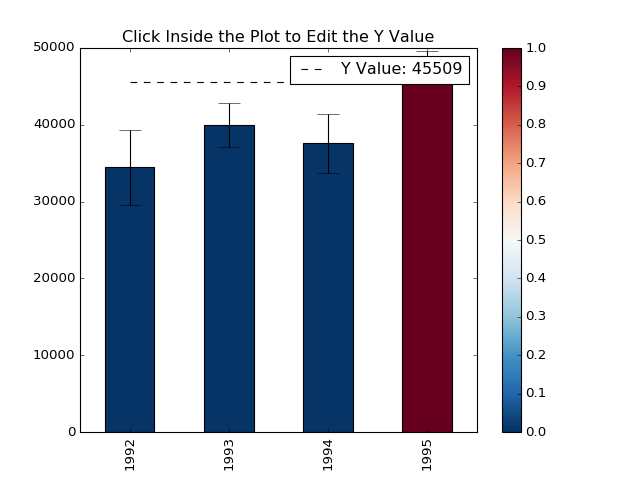

In [5]:
ax = plt.figure()

# Initial y value
y = 40000

# Add colour bar
z = np.array([0,1])
plot = plt.scatter(z, z, c = z, cmap = 'RdBu_r')
plt.clf()
plt.colorbar(plot)

# Produce initial run
graph(y, df, yerr)

# Adding Interactivity
plt.gcf().canvas.mpl_connect('button_press_event', onclick);

#mpld3.show()